Available Variables: ['pre', 'tem', 'vx', 'vy', 'vz', 'w', 'qv']
Visualizing: pre
Original shape: (324, 42, 5)


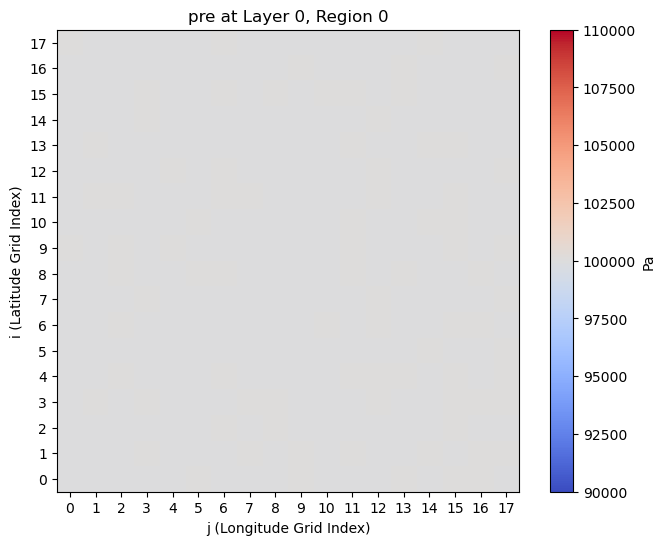

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# File path (update if needed)
json_file = "restart_all_GL05RL01z40.pe000000_reversed.json"

# Load JSON data
with open(json_file, "r") as f:
    data = json.load(f)

# Get available variables
variables = list(data["Variables"].keys())
print("Available Variables:", variables)

# Select a variable to visualize
selected_variable = variables[0]  # Change this to select a different variable
print(f"Visualizing: {selected_variable}")

# Extract data for the selected variable
variable_data = np.array(data["Variables"][selected_variable]["Data"])

# Check original shape
print(f"Original shape: {variable_data.shape}")

# Ensure correct shape order (check if Layer or Region is swapped)
ij_max, num_layers, num_regions = variable_data.shape
imax, jmax = 18, 18  # Expected grid size

# Option 1: Default expected shape
try:
    variable_data = variable_data.reshape((imax, jmax, num_layers, num_regions))
except ValueError:
    print("⚠️ Reshaping failed. Attempting alternative layout.")

    # Option 2: Try swapping layer and region order
    try:
        variable_data = variable_data.reshape((imax, jmax, num_regions, num_layers))
        variable_data = np.transpose(variable_data, (0, 1, 3, 2))  # Swap back
        print("✅ Layer-Region order corrected.")
    except ValueError:
        print("❌ Could not fix the reshaping issue. Please verify data structure.")

# Choose a layer and region to visualize
layer_idx = 0  # Adjust for different vertical layers
region_idx = 0  # Adjust for different regions

# Extract the data slice
visualized_data = variable_data[:, :, layer_idx, region_idx]

# Plot the data
plt.figure(figsize=(8, 6))
plt.imshow(visualized_data, cmap="coolwarm", origin="lower")
plt.colorbar(label=data["Variables"][selected_variable]["Unit"])
plt.title(f"{selected_variable} at Layer {layer_idx}, Region {region_idx}")
plt.xlabel("j (Longitude Grid Index)")
plt.ylabel("i (Latitude Grid Index)")
plt.xticks(range(jmax))
plt.yticks(range(imax))
plt.show()
